# A. Model Selection and Hyper-parameters Tunning
In this section, we will introduce the concept of model selection and hyperparameter tuning in machine learning models.

## Import Libraries


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## 1) Read  the  data  from  the  csv  file, split  it and Plot.


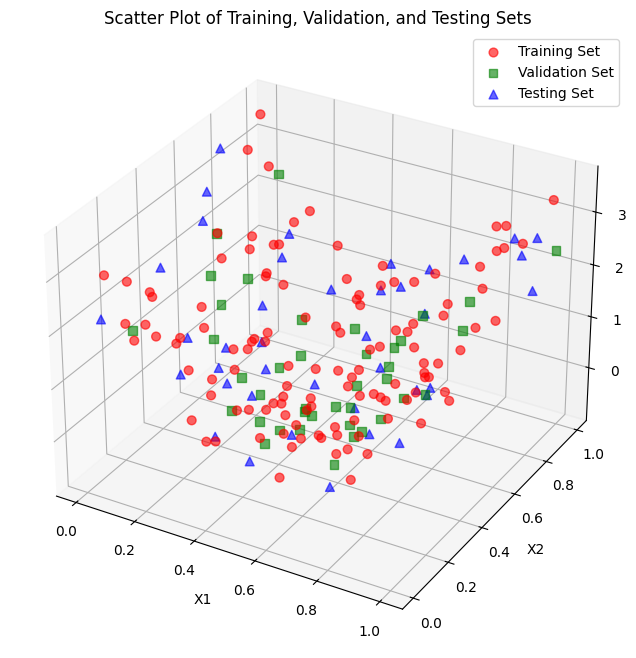

In [5]:
# Read the CSV file
data = pd.read_csv('data_reg.csv')

# Split the data into training, validation, and testing sets
training_set = data[:120]
validation_set = data[120:160]
testing_set = data[160:]

# Scatter plot for training set
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
# 's' parameter to control the marker size and the 'alpha' parameter to control transparency(to be more clear).
ax.scatter(training_set['x1'], training_set['x2'], training_set['y'], c='r', marker='o', s=40, alpha=0.6, label='Training Set')

# Scatter plot for validation set
ax.scatter(validation_set['x1'], validation_set['x2'], validation_set['y'], c='g', marker='s', s=40, alpha=0.6, label='Validation Set')

# Scatter plot for testing set
ax.scatter(testing_set['x1'], testing_set['x2'], testing_set['y'], c='b', marker='^', s=40, alpha=0.6, label='Testing Set')

# Set axis labels
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')

# Set legend
ax.legend()
# Set plot title
plt.title('Scatter Plot of Training, Validation, and Testing Sets')


# Show the plot
plt.show()

The code generates a 3D scatter plot to visually represent a dataset split into training, validation, and testing sets. The plot uses distinct colors and marker styles for each set: blue circles for the training set, green squares for the validation set, and red triangles for the testing set. This visualization allows for an intuitive understanding of how the features (x1 and x2) relate to the target label (y) in different subsets of the data. The plot serves as a helpful tool for assessing the dataset's characteristics and potential patterns, supporting the analysis of a machine learning model's performance on various sets.

## 2) Apply polynomial regression on the training set.

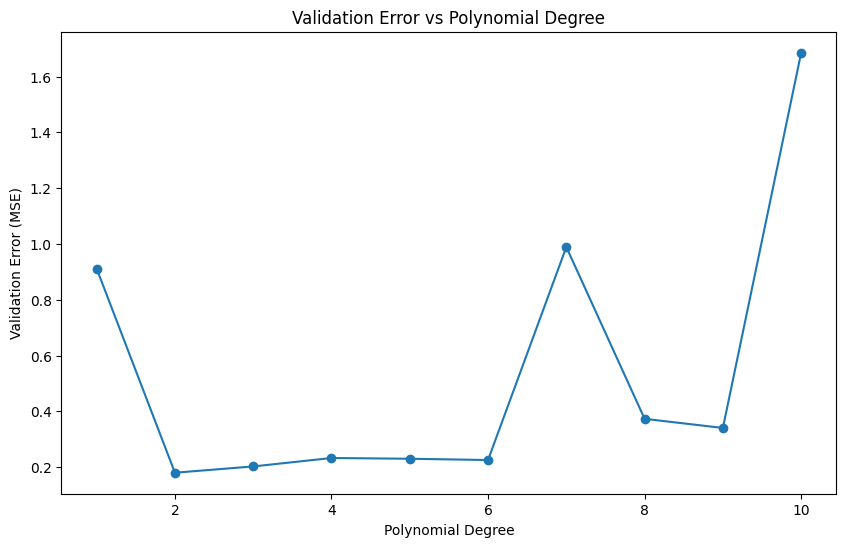

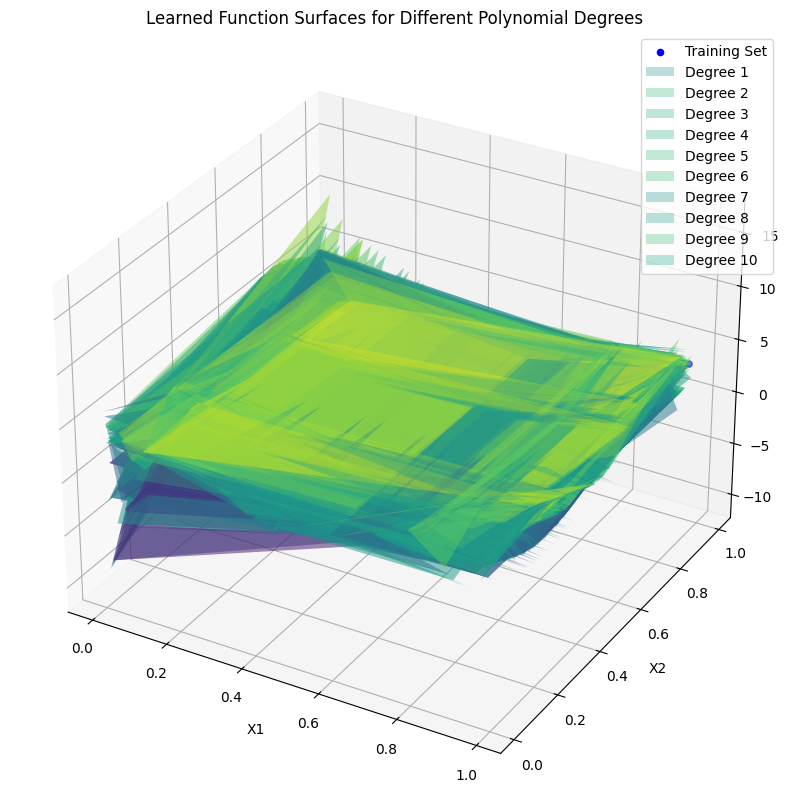

The best polynomial degree is 2 based on validation error.


In [6]:
# Function to create polynomial features
def create_polynomial_features(X, degree):
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)
    return X_poly

# Function to train polynomial regression model
def train_polynomial_regression(X, y, degree):
    X_poly = create_polynomial_features(X, degree)
    model = LinearRegression()
    model.fit(X_poly, y)
    return model

# Function to plot the learned function surface
def plot_learned_function(ax, model, degree, X, y):
    X_poly = create_polynomial_features(X, degree)

    # Create a meshgrid for plotting the surface
    xx, yy = np.meshgrid(X.iloc[:, 0], X.iloc[:, 1])
    zz = np.array([model.predict(create_polynomial_features(np.array([[x, y]]), degree))[0] for x, y in zip(xx.ravel(), yy.ravel())])
    zz = zz.reshape(xx.shape)

    # Plot the surface
    ax.plot_surface(xx, yy, zz, alpha=0.3, cmap='viridis', label=f'Degree {degree}')

# Function to plot validation error vs polynomial degree curve
def plot_validation_curve(degrees, validation_errors):
    plt.figure(figsize=(10, 6))
    plt.plot(degrees, validation_errors, marker='o')
    plt.title('Validation Error vs Polynomial Degree')
    plt.xlabel('Polynomial Degree')
    plt.ylabel('Validation Error (MSE)')
    plt.show()

# Step 1: Extract features (X) and target (y) from the training set
X_train = training_set[['x1', 'x2']]
y_train = training_set['y']

# Step 2: Initialize arrays to store validation errors for each degree
degrees = np.arange(1, 11)
validation_errors = []

# Step 3: Train polynomial regression models for each degree and calculate validation error
for degree in degrees:
    model = train_polynomial_regression(X_train, y_train, degree)

    # Calculate validation error
    X_val = validation_set[['x1', 'x2']]
    y_val = validation_set['y']
    X_val_poly = create_polynomial_features(X_val, degree)
    predictions = model.predict(X_val_poly)
    mse = mean_squared_error(y_val, predictions)
    validation_errors.append(mse)

# Step 4: Plot the validation error vs polynomial degree curve
plot_validation_curve(degrees, validation_errors)

# Step 5: Determine the best polynomial degree based on the minimum validation error
best_degree = degrees[np.argmin(validation_errors)]

# Step 6: Plot the learned function surfaces alongside training examples for the best degree
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot training set
ax.scatter(training_set['x1'], training_set['x2'], training_set['y'], c='b', marker='o', label='Training Set')

# Plot learned function surfaces
for degree in degrees:
    model = train_polynomial_regression(X_train, y_train, degree)
    plot_learned_function(ax, model, degree, X_train, y_train)

# Set axis labels
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')

# Set plot title
plt.title('Learned Function Surfaces for Different Polynomial Degrees')

# Add legend
ax.legend()

# Show the plot
plt.show()

# Print the best polynomial degree
print(f"The best polynomial degree is {best_degree} based on validation error.")